In [5]:
import torch
import albumentations as A
from albumentations.pytorch import ToTensorV2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import os
import json

### Initial Visualization and Augmentation

In [6]:
def polygon_to_bounding_box(json_data, file):
    bounding_box_list = []
    for item in json_data[file].values():
        if isinstance(item, dict):
            if item != {}:
                length = len(item.values())
                for i in range(length):
                    print(item[str(i)]['shape_attributes']['all_points_x'])
                    print(item[str(i)]['shape_attributes']['all_points_y'])
                    poly_x = item[str(i)]['shape_attributes']['all_points_x']
                    poly_y = item[str(i)]['shape_attributes']['all_points_y']
                    # Compute bounding box
                    x_min, x_max = min(poly_x), max(poly_x)
                    y_min, y_max = min(poly_y), max(poly_y)
                    bbox_width = x_max - x_min
                    bbox_height = y_max - y_min
                    # Match format: [x, y, width, height]
                    bounding_box_list.append([int(x_min), int(y_min), int(bbox_width), int(bbox_height)])
    return bounding_box_list

In [7]:
def visualization(bboxes, labels, ax):
    for box, label in zip(bboxes, labels):
        # x_min, y_min, box_width, box_height = map(int, box)
        x_min, y_min, box_width, box_height = box
        if label == 'Thyrocyte' or label == 'Thyrocytes':
            rect = plt.Rectangle(
            ( x_min, y_min),
                box_width, box_height,
                linewidth=.2, edgecolor="blue", facecolor="none"
            )
        else:
            rect = plt.Rectangle(
            ( x_min, y_min),
                box_width, box_height,
                linewidth=.5, edgecolor="red", facecolor="none"
            )
        ax.add_patch(rect)
        ax.text(
            x_min, y_min - 5, label,
            color="blue", fontsize=2, weight="bold"
        )

In [8]:
def save(augmented_image, augmented_bboxes, augmented_labels, file):
    # aug_np = augmented_image.permute(1, 2, 0).cpu().numpy()
    Image.fromarray(augmented_image).save("augmented_" + file)

    # Save annotations
    aug_df = pd.DataFrame(augmented_bboxes, columns=["bbox_x", "bbox_y", "bbox_width", "bbox_height"])
    aug_df["label_name"] = augmented_labels
    csv_name = file.replace('.jpg', 'A.csv')
    aug_df.to_csv("augmented_" + csv_name, index=False)

In [9]:
transform = A.Compose(
    [
        # Geometric Transformations
        A.OneOf([
            A.HorizontalFlip(p=1),
            A.VerticalFlip(p=1),
            A.RandomRotate90(p=1),
        ], p=1),
        # Photometric Transformations
        A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
        A.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=15, val_shift_limit=10, p=0.5),
        A.GaussNoise(std_range=(0.1, 0.2), p=1.0),
        A.CoarseDropout(
        num_holes_range=(3, 3),
        hole_height_range=(3, 3),
        hole_width_range=(3, 3),
        fill="random_uniform",
        p=0.5),
        # A.GridDropout(ratio=0.5, p=0.5)
        # ToTensorV2()
    ],
    bbox_params=A.BboxParams(format='coco', label_fields=['labels'])
)

Processing image: LS-269.jpg
[1204.0168302945297, 1228.2704067321172, 1283.7071528751746, 1356.4678821879377, 1347.805890603085, 1346.0734922861143, 1271.5803646563809, 1228.2704067321172, 1157.2420757363248, 1100.0729312762967, 1081.0165497896207, 1051.5657784011214, 1032.5093969144455, 997.8614305750345, 964.9458625525942, 944.1570827489477, 904.3119214586251, 876.5935483870963, 859.2695652173909, 835.0159887798033, 810.7624123422156, 791.7060308555396, 809.030014025245, 845.4103786816265, 897.3823281907429, 880.0583450210374, 840.2131837307148, 833.2835904628326, 815.9596072931272, 814.2272089761567, 807.2976157082745, 809.030014025245, 805.5652173913039, 798.6356241234217, 779.5792426367458, 757.0580645161286, 750.1284712482465, 741.4664796633938, 731.0720897615705, 713.748106591865, 696.4241234221596, 680.8325385694246, 677.3677419354835, 673.9029453015424, 658.3113604488075, 647.9169705469842, 628.8605890603083, 609.8042075736322, 590.7478260869563, 571.6914446002802, 563.0294530

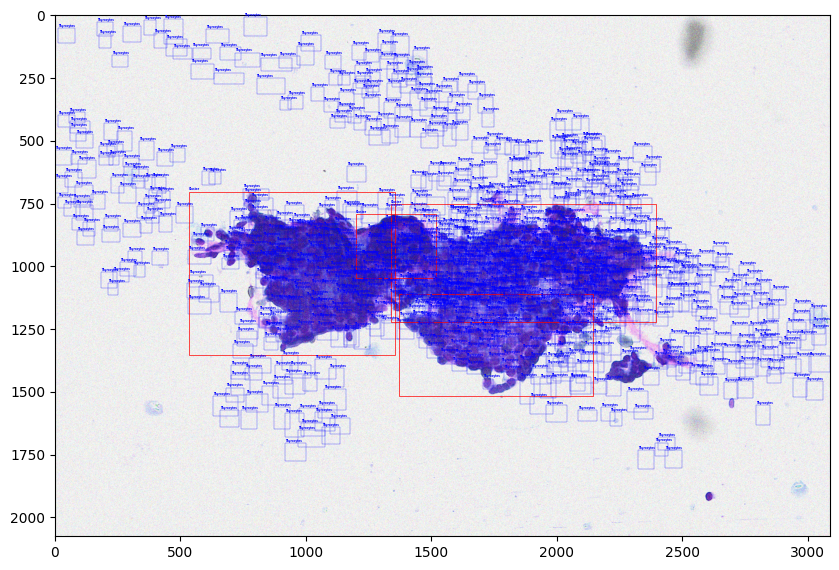

Processing image: LS-155.jpg
[1346.3209551014422, 1350.8445030396242, 1397.2108694059905, 1426.6139310041742, 1448.100783710539, 1444.7081227569024, 1487.6818281696321, 1525.0010986596344, 1557.7968212114545, 1621.1264923460037, 1624.5191532996403, 1591.7234307478202, 1557.7968212114545, 1621.1264923460037, 1677.6708415732796, 1681.0635025269162, 1618.8647183769126, 1600.7705266241842, 1575.891012964183, 1500.121584999633, 1449.2316706950846, 1414.1741741741735, 1393.818208452354, 1374.59312971508, 1332.750311286896, 1303.3472496887123, 1275.0750750750744, 1272.8133011059833, 1295.4310407968937, 1266.0279791987102, 1260.3735442759826, 1294.3001538123483, 1345.1900681168966, 1350.8445030396242, 1346.3209551014422]
[1438.5688127151534, 1438.5688127151534, 1473.6263092360646, 1461.1865524060638, 1405.7730901633333, 1368.453819673331, 1363.930271735149, 1317.5639053687828, 1316.4330183842371, 1311.9094704460551, 1257.62689518787, 1205.6060938987762, 1179.5956932542292, 1177.333919285138, 1

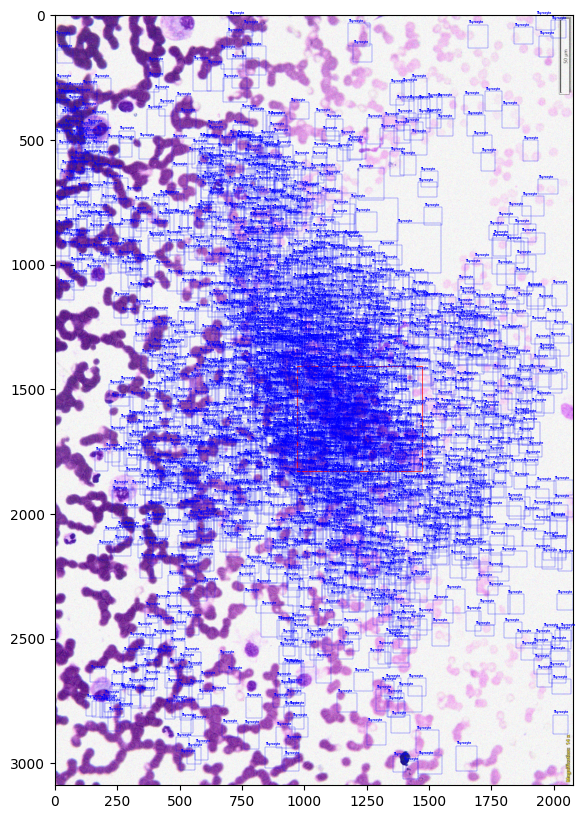

In [10]:
dataset = os.walk('/home/Special_Problem/Data')
for root, dirs, files in dataset:
    for file in files:
        if file.endswith('.jpg'):
            print(f"Processing image: {file}")
            try:
                image = Image.open(os.path.join(root, file)).convert("RGB")
                
                path = os.path.join(root + " - ANNOTATED FILES", file.replace('.jpg', 'A.csv'))
                json_path = os.path.join(root + " - ANNOTATED FILES", file.replace('.jpg', 'B.json'))
                
                with open(json_path, 'r') as f:
                    json_data = json.load(f)
                df = pd.read_csv(path)
                
                df_labels  = df['label_name'].tolist()  # Assuming single class for simplicity
                df_bboxes = df[['bbox_x','bbox_y','bbox_width','bbox_height']].apply(lambda x: [x['bbox_x'], x['bbox_y'], x['bbox_width'], x['bbox_height']], axis=1).tolist()
                
                # From JSON polygons
                cluster_bboxes = polygon_to_bounding_box(json_data, file)
                cluster_labels = ["Cluster"] * len(cluster_bboxes)
                
                # Combine both
                all_bboxes = df_bboxes + cluster_bboxes
                all_labels = df_labels + cluster_labels
                
                fig, ax = plt.subplots(1, figsize=(10, 10))
                
                # Augment
                augmented = transform(image=np.array(image), bboxes=all_bboxes, labels=all_labels)
                augmented_image = augmented['image']
                augmented_bboxes = augmented['bboxes']
                augmented_labels = augmented['labels']
                
                ax.imshow(augmented_image.astype(np.uint8))
                visualization(augmented_bboxes, augmented_labels, ax)
                
                # ax.imshow(image)
                # visualization(all_bboxes, all_labels, ax)
                
                plt.show()
            except FileNotFoundError:
                print("File not found")
            break
        break

### Conversion of Coco to Yolo

In [11]:
def get_normalize_bounding_box(x_min, y_min, bbox_width, bbox_height, img_width, img_height):
    x_center = (x_min + bbox_width / 2) / img_width
    y_center = (y_min + bbox_height / 2) / img_height
    w_norm = bbox_width / img_width
    h_norm = bbox_height / img_height
    return x_center, y_center, w_norm, h_norm

In [ ]:
dataset = os.walk('/home/Special_Problem/Data')
# {'Cluster', 'Clusters', 'Thyrocyte', 'Thyrocytes'}
label_map = {'Cluster' : 0, 'Clusters': 0, 'Thyrocyte': 1, 'Thyrocytes': 1}
# labels = set()
for root, dirs, files in dataset:
    for file in files:
        if file.endswith('.jpg'):
            basename = file.split('.')[0]
            try:
                image = Image.open(os.path.join(root, file)).convert("RGB")
                img_width, img_height = image.size
                
                path = os.path.join(root + " - ANNOTATED FILES", file.replace('.jpg', 'A.csv'))
                json_path = os.path.join(root + " - ANNOTATED FILES", file.replace('.jpg', 'B.json'))
                
                with open(json_path, 'r') as f:
                    json_data = json.load(f)
                df = pd.read_csv(path)
                
                out_path = f"/home/Special_Problem/yolo_dataset/labels/train/{basename}.txt"
                with open(out_path, "w") as out_f:
                    
                    # Dataframe (Thyrocytes)
                    for _, row in df.iterrows():
                        class_id = label_map[row['label_name']]
                        x_min = row['bbox_x']
                        y_min = row['bbox_y']
                        bbox_width = row['bbox_width']
                        bbox_height = row['bbox_height']
                        
                        x_center, y_center, w_norm, h_norm = get_normalize_bounding_box(
                            x_min, y_min, bbox_width, bbox_height, img_width, img_height
                        )
                        out_f.write(f"{class_id} {x_center:.6f} {y_center:.6f} {w_norm:.6f} {h_norm:.6f}\n")
                        
                    # JSON (Clusters)
                    for item in json_data[file].values():
                        if isinstance(item, dict) and item:
                            for region in item.values():
                                label = region['region_attributes']["label"]
                                class_id = label_map[label]  # map to int
                                
                                poly_x = region['shape_attributes']['all_points_x']
                                poly_y = region['shape_attributes']['all_points_y']
                                
                                x_min, x_max = min(poly_x), max(poly_x)
                                y_min, y_max = min(poly_y), max(poly_y)
                                bbox_width = x_max - x_min
                                bbox_height = y_max - y_min
                                
                                x_center, y_center, w_norm, h_norm = get_normalize_bounding_box(
                                    x_min, y_min, bbox_width, bbox_height, img_width, img_height
                                )
                                out_f.write(f"{class_id} {x_center:.6f} {y_center:.6f} {w_norm:.6f} {h_norm:.6f}\n")
                                
            except FileNotFoundError:
                print("File not found")

1 0.806833 0.370665 0.026878 0.039981

1 0.803918 0.456647 0.027526 0.047206

1 0.764734 0.515896 0.021049 0.049133

1 0.760687 0.432322 0.029793 0.048651

1 0.743199 0.457852 0.032383 0.035164

1 0.736561 0.434971 0.031412 0.042389

1 0.742066 0.402938 0.026231 0.058285

1 0.723284 0.408237 0.024935 0.039981

1 0.719883 0.372110 0.022021 0.048651

1 0.707254 0.397158 0.020725 0.030347

1 0.712921 0.437861 0.024288 0.033719

1 0.734780 0.489884 0.029145 0.037572

1 0.746600 0.514210 0.024288 0.045761

1 0.726360 0.527938 0.029145 0.042389

1 0.718588 0.494942 0.025907 0.040944

1 0.705959 0.474229 0.032383 0.027457

1 0.694786 0.444605 0.027526 0.042389

1 0.704987 0.370424 0.020725 0.038536

1 0.708549 0.351156 0.017487 0.033719

1 0.693815 0.351397 0.022992 0.030347

1 0.693167 0.332852 0.029469 0.032755

1 0.686690 0.314066 0.027526 0.037572

1 0.678109 0.289258 0.025907 0.032274

1 0.652850 0.287091 0.025259 0.037572

1 0.647183 0.235549 0.026878 0.032755

1 0.627915 0.250963 0.030